<a href="https://colab.research.google.com/github/AhmedWael2000/internet-dataset/blob/main/Project_Internet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
df=pd.read_csv("Internet.csv")




In [ ]:
df.tail()
df.head()

In [ ]:
result = df.loc[df['Entity'] == '']
print(result)
#print(df['Entity'].unique())
# To search on specific values

Empty DataFrame
Columns: [Unnamed: 0, Entity, Code, Year, Cellular Subscription, Internet Users(%), No. of Internet Users, Broadband Subscription]
Index: []


In [ ]:
df = df.drop(df[(df['Cellular Subscription'] ==0 ) & (df['Internet Users(%)'] == 0) & (df['No. of Internet Users'] == 0) & (df['Broadband Subscription'] == 0)].index)

# Drop zero rows

In [ ]:
df = df.dropna(subset=['Cellular Subscription', 'Internet Users(%)', 'No. of Internet Users','Broadband Subscription'], how='any')

# Drop NaN rows


In [ ]:
df=df.drop(df[df['Year']<1989].index)

# drop years less than 1989


In [ ]:
df.drop_duplicates(inplace=True)
# Drop duplicantes

In [ ]:
df=df.drop(columns=['Code','Unnamed: 0'])
# drop Cellular Subscription Column which was not useful for us df=df.drop(columns=['Cellular Subscription','Unnamed: 0','Code'])


In [ ]:
df=df.drop(df[df['Entity']=='Israel'].index)
# drop ****** from the whole data frame

In [ ]:
df['Increading as %']=df['No. of Internet Users'].pct_change()*100
# Add column that provides the % of increasing in Internet users

In [ ]:
#-------------------------------------------------------------------------------------------------------------------#

In [ ]:
World=df[df['Entity']=="World"]
# Separate world As an individual data frame

In [ ]:
eg=df[df['Entity']=="Egypt"]
# Separate Egypt As an individual data frame

In [ ]:
dayear=df[df['Year']==2020]
dayear=dayear.reset_index()
dayearas=df[(df['Year']==2020) & (df['Increading as %']>25)]
dayearas=dayearas.reset_index()
# Separate 2020 As an individual data frame & Reset_index

dayear.head()


In [ ]:
df.head()
World.tail()
eg.tail()
dayear.tail()

,Entity,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,Increading as %
8702,Vietnam,2020,142.733368,70.300003,6.794402e+07,17.155838,3.318367
8743,World,2020,106.152779,59.940247,4.699886e+09,15.887396,12.059960
8784,Yemen,2020,50.888550,0.000000,0.000000e+00,1.310938,NaN
8825,Zambia,2020,103.917831,19.799999,3.747688e+06,0.447765,21.366098
8866,Zimbabwe,2020,88.755806,29.299999,4.591211e+06,1.368916,19.128278


In [ ]:
from plotly.subplots import make_subplots

<ipython-input-17-a55ed437e7d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=eg.corr()


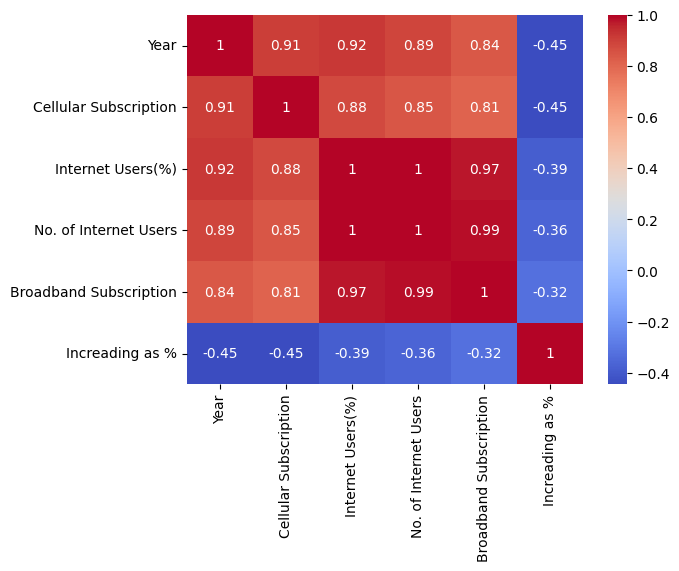

In [ ]:
corr_matrix=eg.corr()
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.show();
#correlations of eg data frame

In [ ]:

fig = px.line(eg, x='Year', y='No. of Internet Users',color_discrete_sequence=['red'],width=int(20/2.54*96), height=int(12.5/2.54*96))
fig.show()
# graph shows the increasing in (internet users) from 1990 to 2020 in Egypt

In [ ]:
fig2=px.line(World,x='Year',y='No. of Internet Users',color_discrete_sequence=['navy'],width=int(20/2.54*96), height=int(12.5/2.54*96))
fig2.show()
# graph shows the increasing in (internet users) from 1990 to 2020 around the globe

In [ ]:

fig3=px.line(df[df['Entity'].isin(['Egypt','Qatar'])], x='Year', y='No. of Internet Users', color='Entity',width=int(20/2.54*96), height=int(12.5/2.54*96))
fig4=px.line(df[df['Entity'].isin(['Egypt','Qatar'])], x='Year', y='Internet Users(%)', color='Entity',width=int(20/2.54*96), height=int(12.5/2.54*96))

# create a 1x2 grid of plots

fig = make_subplots(rows=1, cols=2, subplot_titles=("No. of Internet Users", "% of Internet Users in the country"))

# add each plot to the grid

fig.add_trace(fig3.data[0], row=1, col=1)
fig.add_trace(fig3.data[1], row=1, col=1)

fig.add_trace(fig4.data[0], row=1, col=2)
fig.add_trace(fig4.data[1], row=1, col=2)

# update the layout of the grid

fig.show()

In [ ]:

# Misleading Insight could be Occur due to choosing wrong property

In [ ]:
# Misleading Insight could be Occur due to choosing wrong property


In [ ]:
num_increase_2020=df.dropna(subset=["Increading as %"])
px.scatter(num_increase_2020[num_increase_2020['Entity'].isin(['Egypt','Tunisia','United Arab Emirates'])],x='Year',y='Internet Users(%)',color='Entity',size='No. of Internet Users',opacity=0.5)
# Increasing in % of internet users & visualize the no of users for(Egypn,Tunisia, United Arab Emirates )

In [ ]:
fig = px.treemap(dayearas, values='Increading as %', path=['Entity'], title='the most Increading as %',color_discrete_sequence=[])
fig.show()
# create a treemap chart with the Increading as % >25 and the country

#color_discrete_sequence=(0, 128, 255),co = ['#ADD8E6','#87CEEB','#000080','#4682B4']

